In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

% matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

sns.set_context('notebook')
sns.set_style('white')

### 1. 熟悉numpy数组

In [2]:
np.eye(6, dtype='int')

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [3]:
np.identity(6, dtype='int')

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

### 2. 单变量回归

In [4]:
data = np.loadtxt('./linear_regression_data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = data[:, 1]

说明：一般的单变量函数关系为$f(x) = \theta x + b = \theta_1x_1 + \theta_0x_0$，设$b = \theta_0x_0$，并令$x_0 = 1$，也就是说$b = \theta_0$，故而可以将截距项纳入到整个矩阵中参与运算..

比如我们有如下方程组（三元）：

$$\begin{cases}
    2x + 3y = 2 \\
    3y + 7z = 3 \\
    5x + y + z = 11
\end{cases}$$

该方程组的行空间表示如下：

$$\begin{bmatrix}
    2 & 3 & 0 \\
    0 & 3 & 7 \\
    5 & 1 & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y \\
    z
    \end{bmatrix} =
    \begin{bmatrix}
    2 \\
    3 \\
    11
    \end{bmatrix}$$
    
实则行空间的每一个方程表示的是一个三维平面，而多元则表示的是一个超平面。方程组的所有系数构成系数矩阵，与变量构成的列向量内积，得到结果列向量。

而另一种列空间的表示方法为：

$$\begin{bmatrix}
    2 \\
    0 \\
    5
    \end{bmatrix}x +
    \begin{bmatrix}
    3 \\
    3 \\
    1
    \end{bmatrix}y +
    \begin{bmatrix}
    0 \\
    7 \\
    1
    \end{bmatrix}z =
    \begin{bmatrix}
    2 \\
    3 \\
    11
    \end{bmatrix}$$
    
列空间实则是有各参数系数列向量构成的线性组合张成的空间。

故而，对于$f(x) = \theta_1x_1 + \theta_0x_0 =
\begin{bmatrix}
    \theta_1 & \theta_0
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_0
\end{bmatrix} = 
\begin{bmatrix}
    \theta_1 \\
    \theta_0
\end{bmatrix}^T
\begin{bmatrix}
    x_1 \\
    x_0
\end{bmatrix}$

Text(0,0.5,'Profit in $10,000s')

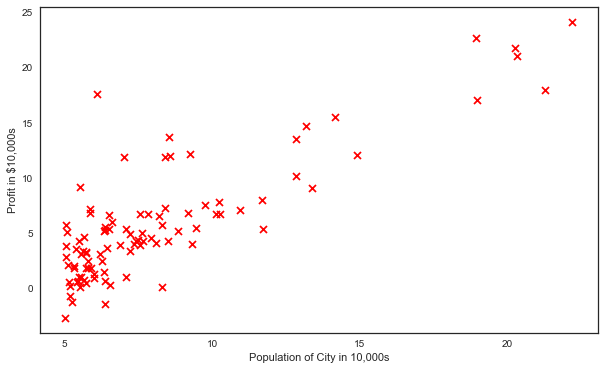

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,1], y, marker='x', color='red', linewidths=1.2)
plt.xticks(np.arange(5, 25, 5))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

上图反应的是城市人口数与收入的关系，人口越多的地方，收入也就越高

### 3、梯度下降

In [6]:
# 定义损失函数

def costFunction(X, y, theta=np.mat([[0], [0]])):
    m = y.size
    h = theta.T.dot(np.mat(X).T)
    
    J = 0
    J = 1/(2*m) * np.square(h - np.mat(y))
    return J.sum()

In [7]:
costFunction(X, y)

32.07273387745567

In [8]:
# 梯度下降

def gradientDescent(X, y, theta=np.mat([[0], [0]]), alpha=0.02, epsilon=4.2, num_iters=2000):
    m = y.size
    iters = 0
    J_hist = []
    
    while iters <= num_iters:
        h = theta.T.dot(np.mat(X).T)
        theta = theta - alpha * 1/m * ((h - np.mat(y)).dot(np.mat(X))).T
        J_hist.append(costFunction(X, y, theta))
        if J_hist[-1] >= epsilon:
            iters = iters + 1
        else:
            break
    return iters, theta, J_hist, J_hist[-1]

Text(0.5,1,'迭代2001次的损失为：4.47697')

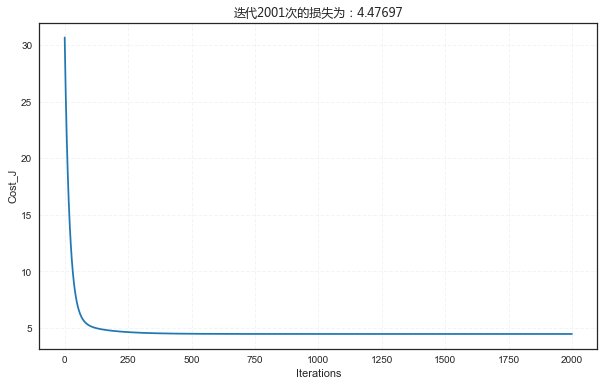

In [9]:
from matplotlib.font_manager import FontProperties

font = FontProperties(family='sans-serif', 
                      fname='/Users/johnnie/Library/Fonts/Microsoft YaHei.ttf', 
                      style='italic', weight='bold', size='large')

iters, theta, Cost_J, FinalCost = gradientDescent(X, y, alpha=0.024)

plt.figure(figsize=(10, 6))
plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.grid(linestyle='dashed', alpha=0.2)
plt.title('迭代%i次的损失为：%.5f' %(iters, FinalCost), fontproperties=font)

/Users/johnnie/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(0,0.5,'Profit in $10,000s')

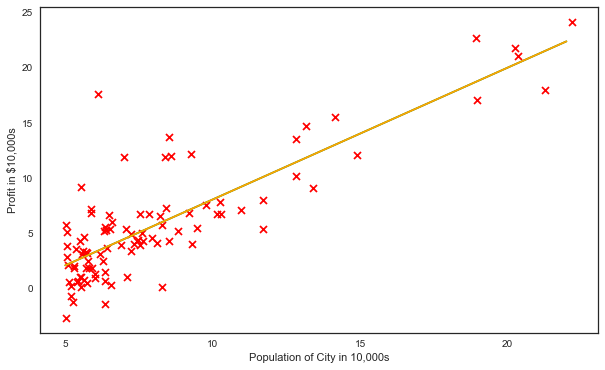

In [10]:
# 对比使用Sklearn LogisticRegressor拟合出来的模型
from sklearn.linear_model import LinearRegression

lerg = LinearRegression()
lerg.fit(X, y)

xx = np.arange(5,23)
yy = theta[1].A1 * xx + theta[0].A1

plt.figure(figsize=(10, 6))
plt.scatter(X[:,1], y, marker='x', color='red', linewidths=1.2)
plt.plot(xx, yy, color='green')
plt.plot(xx, lerg.intercept_ + lerg.coef_[1] * xx, color='orange')

plt.xticks(np.arange(5, 25, 5))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [11]:
print('Sklearn LinearRegressor方法求得模型系数和截距项分别为：', lerg.coef_[1], lerg.intercept_)
print('自定义梯度下降法求得模型系数和截距项分别为：', theta[1].A1, theta[0].A1)

Sklearn LinearRegressor方法求得模型系数和截距项分别为： 1.1930336441895935 -3.8957808783118555
自定义梯度下降法求得模型系数和截距项分别为： [1.19296547] [-3.89510223]


In [12]:
# 再来看下预测数据的情况

from sklearn.metrics import r2_score, median_absolute_error

y_predict = lerg.predict(X)

print('Sklearn的得分为：', r2_score(y, y_predict), median_absolute_error(y, y_predict))
print('自定义的得分为：', r2_score(y, X.dot(theta)), median_absolute_error(y, X.dot(theta)))

Sklearn的得分为： 0.7020315537841397 1.6638310197451778
自定义的得分为： 0.7020315509935202 1.66415990858717


这边来简单梳理下matrix与numpy matrics的一些异同点：

* matrix只能是两维，而matrics可以是多维的
* matrics支持matrix的所有的运算操作
* matrics和matrix都是.T操作，但是matrix会有.H和.I操作
* 对于c\*\*2，matrix返回的是c\*c，而matrics返回的是一个numpy array
* 同时两者能够相互转换，如np.asmatrix，np.asarray

建议以后还是使用numpy matrics进行矩阵操作，比较方便，使用matrix比较麻烦的一点是搞不清楚转置~

参考：https://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u